<a href="https://colab.research.google.com/github/Tushar060723/Music-Genere-Identification/blob/main/Distracted_Driver_MultiAction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2025-06-25 04:00:59--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/z1ltom72vfkw424wgxwvg/state-farm-distracted-driver-detection.zip?rlkey=bydwgjsezgyf0eki4ecb0oeti [following]
--2025-06-25 04:00:59--  https://www.dropbox.com/scl/fi/z1ltom72vfkw424wgxwvg/state-farm-distracted-driver-detection.zip?rlkey=bydwgjsezgyf0eki4ecb0oeti
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc806fb759f136c6cf81a0b69191.dl.dropboxusercontent.com/cd/0/inline/CsQ7fz1VJCT4rnDhDsRNy3PKVhCzKGZC_EOOhCE8dkUAj_5Vix9wVs4tZ3AQZKwz7eSV895Z3hfMuei7Y8wXkLdQJATaEfh5xT-yVYPjaPlZ-zYop5VdMiBhkO4ZLe4nZPw/file# [following]
--2025-06-25 04:01:00--  https:/

In [3]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [6]:
len(os.listdir('test'))

79726

In [7]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [8]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Test directory
%mkdir Test

In [13]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [14]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'

)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [15]:
type(test_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [16]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

# Fit

In [17]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 324s 572ms/step - accuracy: 0.1163 - loss: 2.7800 - val_accuracy: 0.2650 - val_loss: 2.0640
Epoch 2/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.2188 - loss: 2.1138 - val_accuracy: 0.2112 - val_loss: 2.1268
Epoch 3/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 366s 587ms/step - accuracy: 0.2016 - loss: 2.1789 - val_accuracy: 0.3667 - val_loss: 1.7604
Epoch 4/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.3125 - loss: 2.2133 - val_accuracy: 0.3652 - val_loss: 1.7621
Epoch 5/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 354s 587ms/step - accuracy: 0.3526 - loss: 1.8738 - val_accuracy: 0.3658 - val_loss: 1.7131
Epoch 6/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.3750 - loss: 1.7043 - val_accuracy: 0.3672 - val_loss: 1.7134
Epoch 7/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 354s 583ms/step - accuracy: 0.3992 - loss: nan - val_accuracy: 0.1109 - val_loss: nan
Epoch 8/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.0625 - loss: nan - v

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [19]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [20]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Validate

In [21]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [22]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 460s 814ms/step - accuracy: 0.2384 - loss: 2.4250 - val_accuracy: 0.2917 - val_loss: 2.2313
Epoch 2/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.5000 - loss: 1.4195 - val_accuracy: 0.2815 - val_loss: 2.2355
Epoch 3/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 441s 788ms/step - accuracy: 0.5485 - loss: 1.2529 - val_accuracy: 0.8000 - val_loss: 0.6058
Epoch 4/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 35s 61ms/step - accuracy: 0.6250 - loss: 1.0215 - val_accuracy: 0.8045 - val_loss: 0.6015
Epoch 5/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 466s 786ms/step - accuracy: 0.7028 - loss: 0.8317 - val_accuracy: 0.8167 - val_loss: 0.5410


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

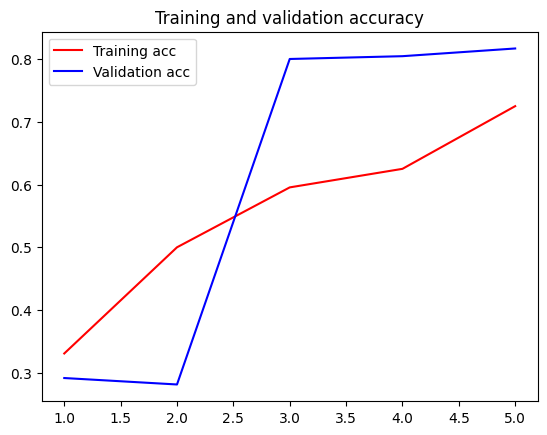

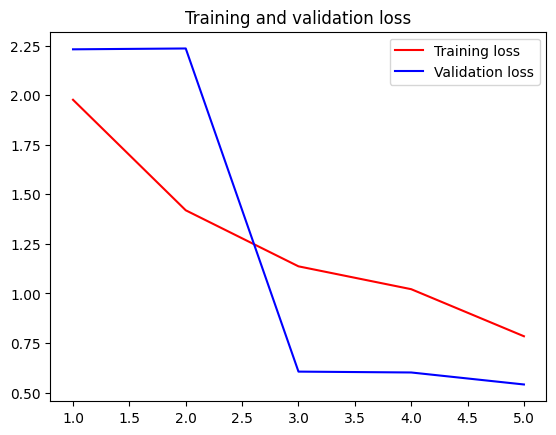

In [24]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

39863/39863 ━━━━━━━━━━━━━━━━━━━━ 800s 20ms/step


In [27]:
pred

array([[1.9016419e-05, 8.4792424e-07, 6.3839121e-05, ..., 5.2231858e-03,
        1.8195770e-04, 4.1782037e-05],
       [1.8706735e-03, 1.4918813e-04, 1.1225138e-03, ..., 1.7765893e-02,
        8.7200934e-03, 1.3055459e-03],
       [9.7133555e-02, 5.6585181e-01, 4.1447035e-03, ..., 5.3658802e-02,
        2.5813833e-02, 2.5711110e-02],
       ...,
       [1.9627569e-02, 1.3071453e-03, 8.7618820e-02, ..., 8.0721103e-02,
        7.1604863e-02, 9.3114469e-03],
       [4.3612799e-05, 5.4446036e-06, 3.7649703e-01, ..., 1.2480054e-02,
        1.2594923e-01, 3.2453609e-05],
       [8.2911499e-04, 4.6417590e-05, 4.6839504e-04, ..., 9.6228290e-03,
        6.9461507e-03, 5.1777307e-02]], dtype=float32)

In [28]:
len(pred)

79726

In [29]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,0.000019,8.479242e-07,0.000064,0.000012,0.000021,9.943739e-01,0.000063,0.005223,0.000182,0.000042
1,0.001871,1.491881e-04,0.001123,0.006903,0.005017,9.489968e-01,0.008149,0.017766,0.008720,0.001306
2,0.097134,5.658518e-01,0.004145,0.022967,0.191159,1.022881e-05,0.013550,0.053659,0.025814,0.025711
3,0.008794,2.005924e-02,0.014779,0.000704,0.042969,2.048437e-04,0.788465,0.006207,0.116019,0.001798
4,0.043515,6.787351e-05,0.003832,0.097739,0.787495,6.203396e-03,0.002886,0.001223,0.050829,0.006209
...,...,...,...,...,...,...,...,...,...,...
79721,0.000145,2.907084e-01,0.131381,0.000044,0.000241,3.555246e-03,0.286769,0.214030,0.070817,0.002310
79722,0.079691,4.012257e-01,0.152731,0.222596,0.061264,2.078772e-04,0.015231,0.011323,0.034988,0.020743
79723,0.019628,1.307145e-03,0.087619,0.033590,0.649180,6.982420e-04,0.046341,0.080721,0.071605,0.009311
79724,0.000044,5.444604e-06,0.376497,0.000002,0.000788,9.266261e-07,0.484201,0.012480,0.125949,0.000032


In [34]:
!pip install gspread

In [32]:
from google.colab import sheets

In [35]:
import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

In [37]:
sheet = sheets.InteractiveSheet(df=labels_test_predictions)

https://docs.google.com/spreadsheets/d/1HupjWBrRjm8EfcJoDYnoV4aJ7AZVYqzHtOIhc6D7T3U/edit#gid=0


In [38]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [40]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>